# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Pada capstone project ini saya akan mencoba melakukan web scraping dari website IMDb. IMDb merupakan sebuah portal entertainment cukup populer yang menyajikan sumber informasi terkait film, TV shows, dan selebriti dari seluruh dunia.

Data yang akan saya scraping dari web IMDb adalah `judul film`, `rating`, `metascore`, `votes` dari halaman daftar film tahun 2021 yang telah di-sorting menurut popularitas (top 50). Saya ingin mengetahui film apa saja yang memiliki `rating`, `metascore`, dan `votes` tertinggi.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [70]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [71]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [72]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Pertama, melalui fungsi inspect element pada halaman web yang akan di-scrap datanya, cari baris code yang merujuk pada tabel keseluruhan pada laman web tersebut. Kita dapat menggunakan method `.find()` untuk men-scrap informasi dari list tersebut.

In [73]:
table = soup.find('div', attrs={'class':'lister list detail sub-list'})
print(table.prettify()[1:1000])

div class="lister list detail sub-list">
 <div class="lister-list">
  <div class="lister-item mode-advanced">
   <div class="lister-top-right">
    <div class="ribbonize" data-caller="filmosearch" data-tconst="tt11286314">
    </div>
   </div>
   <div class="lister-item-image float-left">
    <a href="/title/tt11286314/">
     <img alt="Don't Look Up" class="loadlate" data-tconst="tt11286314" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNjZjNDE1NTYtYTgwZS00M2VmLWEyODktM2FlNjhiYTk3OGU2XkEyXkFqcGdeQXVyMTEyMjM2NDc2._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
    </a>
   </div>
   <div class="lister-item-content">
    <h3 class="lister-item-header">
     <span class="lister-item-index unbold text-primary">
      1.
     </span>
     <a href="/title/tt11286314/">
      Don't Look Up
     </a>
     <span class="lister-item-year text-muted unbold">
      (2021)
     </span>
    </h3>
    <p class="text-muted">


Finding row length.

In [245]:
row = table.find_all('div', attrs={'class':'lister-item mode-advanced'})
row_length = len(row)
row_length

50

Selanjutnya, jalankan proses scraping dan extract data-data yang kita butuhkan dari list tersebut yakni `judul film`, `rating`, `metascore`, dan `votes`

In [286]:
temp=[]

for i in row:
    
    #get titles
    titles=i.find('h3', attrs={'class':'lister-item-header'}).find('a').text
    
    #get imdb rating
    rating=i.find('div', attrs={'class':'inline-block ratings-imdb-rating'}).text
    rating=rating.strip()
    
    #get metascore
    metascore = i.find('div', attrs={'class':'inline-block ratings-metascore'})
    if metascore is not None:
        metascore=i.find('div', attrs={'class':'inline-block ratings-metascore'}).find('span').text
        metascore=metascore.strip()
    else:
        metascore='NaN'
    
    #get votes
    votes=i.find('span', attrs={'name':'nv'}).text
    votes=votes.strip()

    temp.append((titles,rating,metascore,votes))
    
temp

[("Don't Look Up", '7.3', '49', '294,755'),
 ('Spider-Man: No Way Home', '8.8', '71', '358,898'),
 ('The Matrix Resurrections', '5.7', '63', '144,589'),
 ('Encanto', '7.3', '76', '71,003'),
 ('The Book of Boba Fett', '8.1', 'NaN', '15,194'),
 ('1883', '9.1', 'NaN', '12,540'),
 ('The Wheel of Time', '7.3', 'NaN', '71,938'),
 ('Hawkeye', '7.8', 'NaN', '98,685'),
 ('Dexter: New Blood', '8.9', 'NaN', '39,822'),
 ("The King's Man", '6.8', '44', '13,519'),
 ('Licorice Pizza', '8.1', '90', '10,349'),
 ('The Power of the Dog', '7.0', '89', '65,339'),
 ('Sing 2', '7.6', '49', '8,313'),
 ('The Unforgivable', '7.2', '41', '72,415'),
 ('No Time to Die', '7.4', '68', '275,718'),
 ('The Silent Sea', '7.0', 'NaN', '9,280'),
 ('Being the Ricardos', '6.6', '60', '17,558'),
 ('Yellowjackets', '8.0', 'NaN', '10,452'),
 ('Dune: Part One', '8.2', '74', '431,131'),
 ('West Side Story', '7.8', '85', '22,691'),
 ('The Lost Daughter', '6.8', '86', '18,488'),
 ('The Last Duel', '7.4', '67', '81,374'),
 ('Statio

## Creating data frame & Data wrangling

Put the array into dataframe

In [287]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Title','Rating','Metascore','Votes'))
df.head()

,Title,Rating,Metascore,Votes
0,Don't Look Up,7.3,49,"294,755"
1,Spider-Man: No Way Home,8.8,71,"358,898"
2,The Matrix Resurrections,5.7,63,"144,589"
3,Encanto,7.3,76,"71,003"
4,The Book of Boba Fett,8.1,NaN,"15,194"


Cek data types dari tiap object/kolom, kemudian ubah tipe datanya ke tipe data yang benar sesuai bentuknya

In [289]:
df['Rating']=df['Rating'].astype('float64')
df['Metascore']=df['Metascore'].astype('float64')
df['Votes']=df['Votes'].str.replace(',','')
df['Votes']=df['Votes'].astype('int64')

In [290]:
df.dtypes

Title         object
Rating       float64
Metascore    float64
Votes          int64
dtype: object

Mengatur index agar dimulai dari angka 1

In [424]:
import numpy as np
df.index = range(1, df.shape[0] + 1)
df.head()

,Title,Rating,Metascore,Votes
1,Don't Look Up,7.3,49.0,294755
2,Spider-Man: No Way Home,8.8,71.0,358898
3,The Matrix Resurrections,5.7,63.0,144589
4,Encanto,7.3,76.0,71003
5,The Book of Boba Fett,8.1,NaN,15194


Visualisasi data untuk mendapat insight

__Visualisasi Rating__

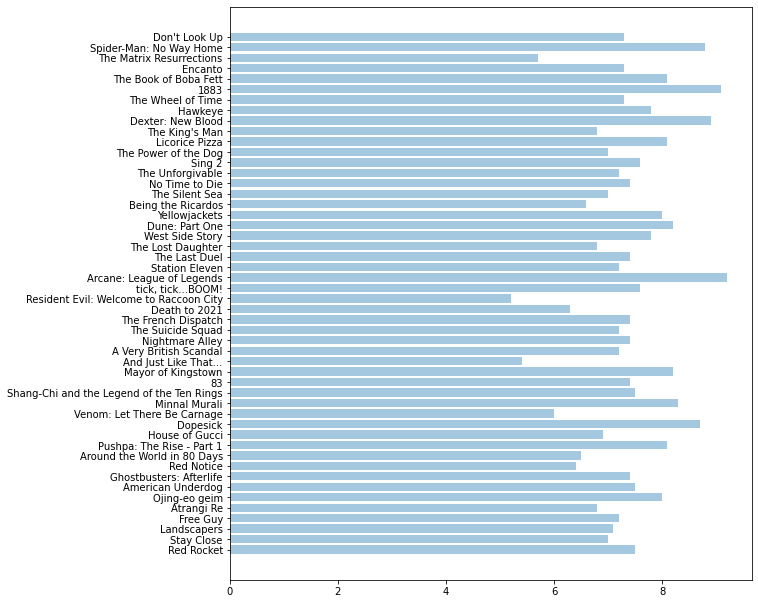

In [417]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(60,50))
ax = fig.add_subplot(666)
yvals = range(len(df['Title']))
ax.invert_yaxis()
ax.barh(yvals, df['Rating'], align='center', alpha=0.4)
plt.yticks(yvals, df['Title'])
plt.tight_layout()
plt.show()

Dari data tersebut, dapat diketahui
- film dengan rating IMDb tertinggi adalah "Arcane: League of Legends"
- film dengan rating IMDb terendah adalah "Resident Evil: Welcome to Raccoon City"

__Visualisasi Metascore__

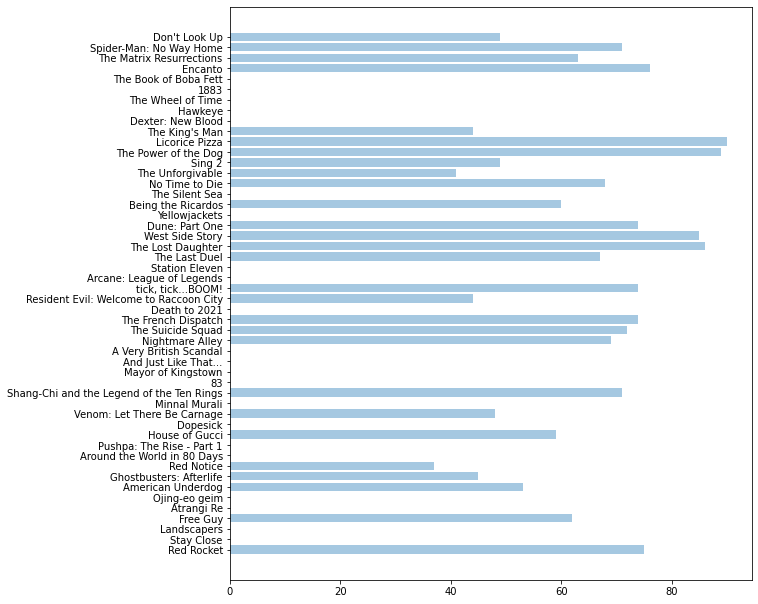

In [418]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(60,50))
ax = fig.add_subplot(666)
yvals = range(len(df['Title']))
ax.invert_yaxis()
ax.barh(yvals, df['Metascore'], align='center', alpha=0.4)
plt.yticks(yvals, df['Title'])
plt.tight_layout()
plt.show()

Dari data tersebut, dapat diketahui
- film dengan metascore tertinggi adalah "Licorice Pizza"

__Visualisasi Votes__

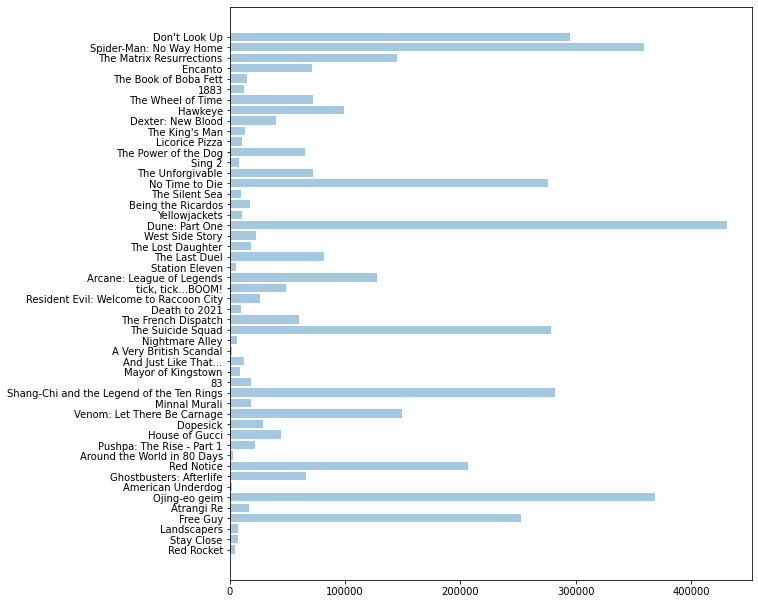

In [427]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(60,50))
ax = fig.add_subplot(666)
yvals = range(len(df['Title']))
ax.invert_yaxis()
ax.barh(yvals, df['Votes'], align='center', alpha=0.4)
plt.yticks(yvals, df['Title'])
plt.tight_layout()
plt.show()

Dari data tersebut, dapat diketahui
- film dengan votes tertinggi adalah "Dune Part One"
- film dengan votes terendah adalah "American Underdog"

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

Dari proses web scraping dan data wrangling di atas, dapat disimpulkan bahwa komponen `rating`, `metascore`, dan `votes` bukan merupakan indikator utama dalam menentukan "top popular movies" oleh IMDb.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.